In [11]:
from qiskit import transpile
from gibbs.preparation.varqite import efficientTwoLocalansatz
from qiskit.providers.fake_provider import FakeMelbourne
from qiskit_aer.noise import NoiseModel
from qiskit.providers import Options

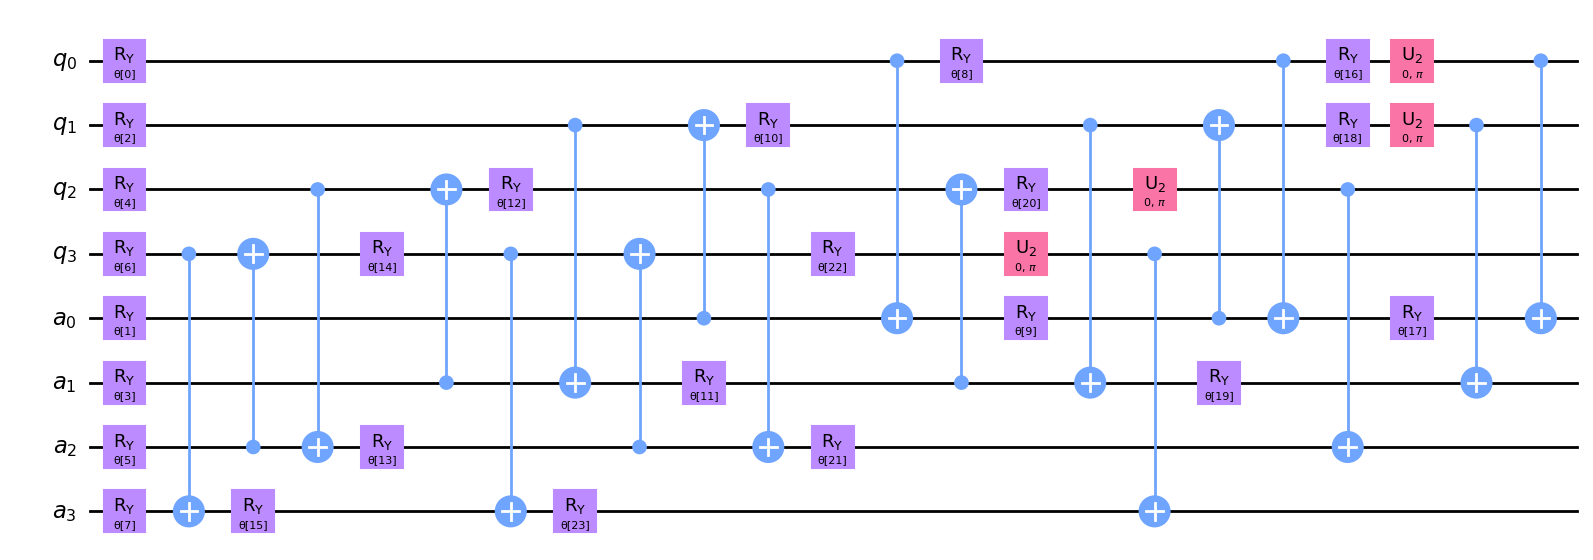

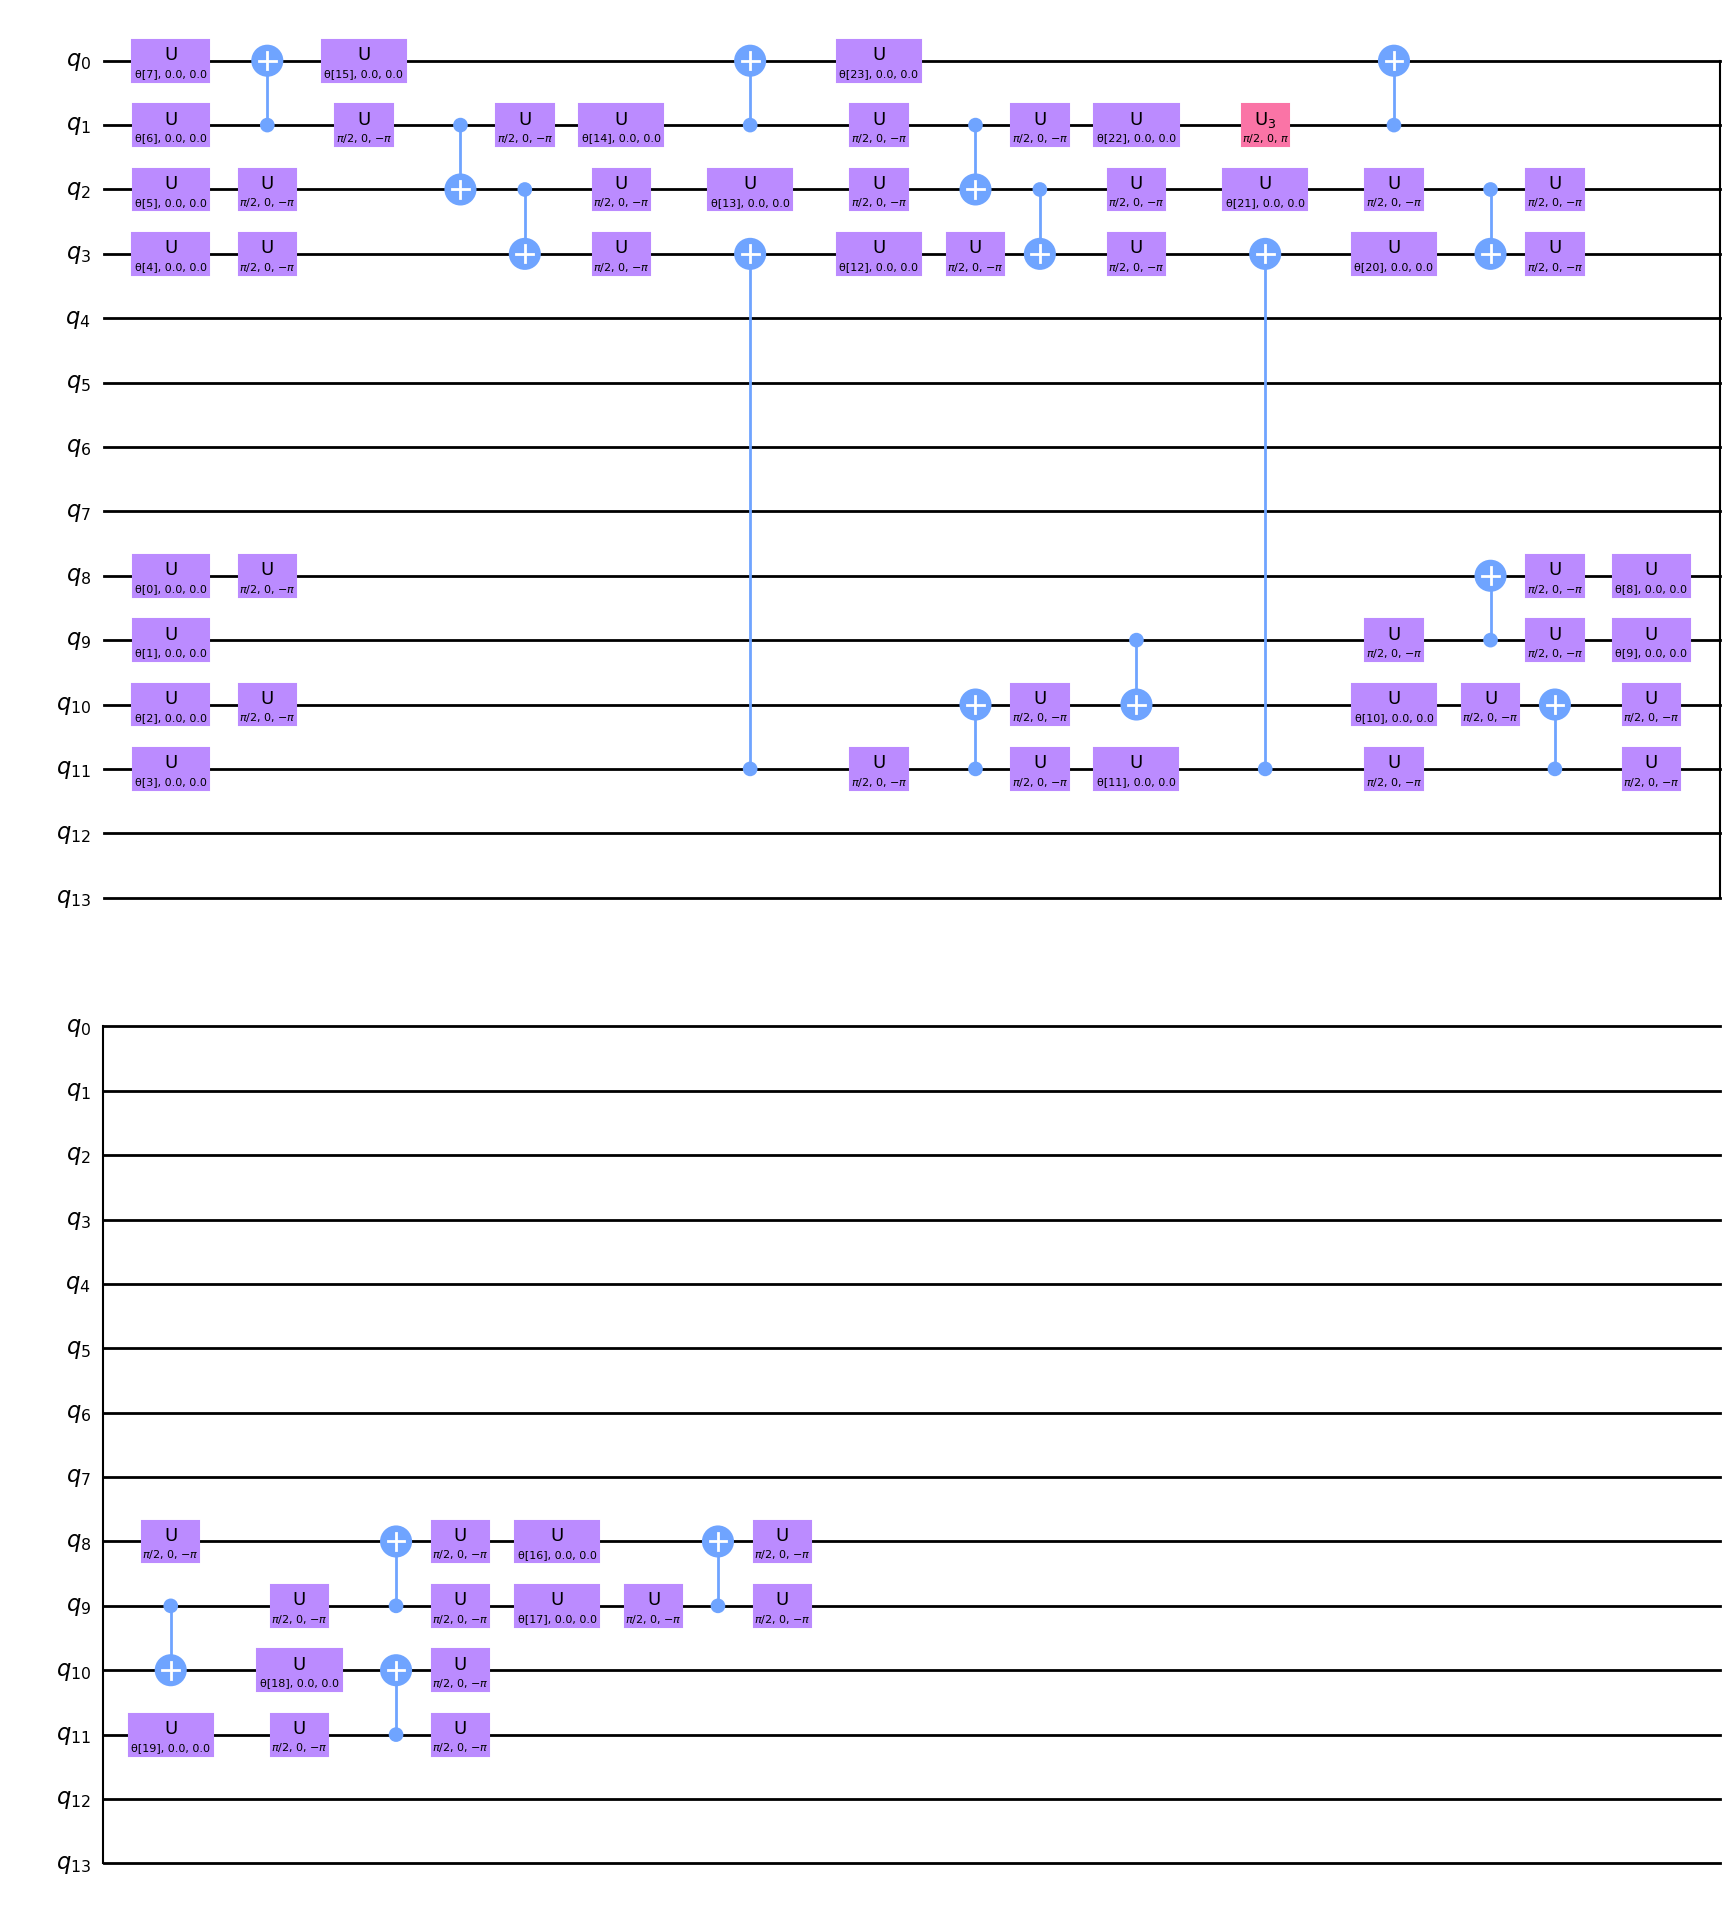

In [17]:
qc = efficientTwoLocalansatz(4,2,"reverse_linear",["ry"])[0]
display(qc.decompose().draw(output="mpl"))
fake_backend = FakeMelbourne()
noise_model = NoiseModel.from_backend(fake_backend)

# Set options to include the noise model
options = Options()
options.simulator = {
    "noise_model": noise_model,
    "basis_gates": fake_backend.configuration().basis_gates,
    "coupling_map": fake_backend.configuration().coupling_map,
    "seed_simulator": 42,
}
qc = transpile(qc,optimization_level=2,backend=fake_backend)
display(qc.decompose().draw(output="mpl"))